In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
base = pd.read_csv('../../Data/BaseData.csv')

In [3]:
base.shape

(2580, 299)

In [4]:
X = base.drop(['SalePrice'], axis=1)
y = base.SalePrice

In [5]:
X.shape

(2580, 298)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,test_size=0.25)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
Ridge = Ridge()

In [8]:
Ridge.fit(X_train_scaled, Y_train)
Ridge_Score = Ridge.score(X_test_scaled, Y_test)

In [9]:
Ridge_Score

0.9141668973862529

In [10]:
predicted_value = Ridge.predict(X_test_scaled)

In [11]:
true_value = Y_test

In [12]:
mae = mean_absolute_error(Y_test, predicted_value)

In [13]:
mae

14938.214261476704

In [14]:
mape = mean_absolute_percentage_error(Y_test, predicted_value)

In [15]:
mape

0.0956934538268179

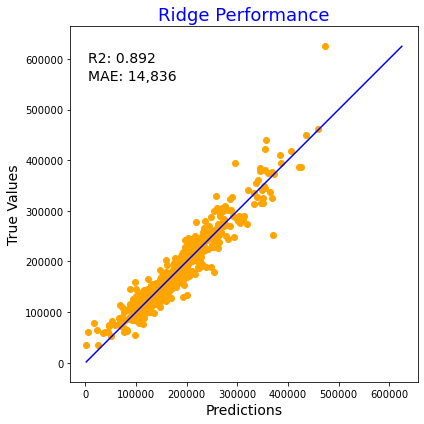

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(predicted_value, true_value, c='orange')
#plt.yscale('log')
#plt.xscale('log')

plt.style.use('default')
plt.style.use('ggplot')

plt.title('Ridge Performance', fontsize=18, color='blue')
p1 = max(max(predicted_value), max(true_value))
p2 = min(min(predicted_value), min(true_value))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.annotate('R2: ' + str('0.892'), xy=(0.05, 0.90), xycoords='axes fraction', fontsize=14)
plt.annotate('MAE: ' + str('14,836'), xy=(0.05, 0.85), xycoords='axes fraction', fontsize=14)
plt.xlabel('Predictions', fontsize=14)
plt.ylabel('True Values', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show();